In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
import logging

In [3]:
logger = logging.getLogger("check_netcdf")
logger.setLevel(logging.DEBUG)

In [8]:
datadir = "/home/ctroupin/Data/EMODnet/winter"
datafile1 = os.path.join(datadir, "Water_body_ammonium.4Danl.nc")
datafile2 = os.path.join(datadir, "Water_body_ammonium.4Danl_c.nc")

Check if files exist

In [12]:
if os.path.exists(datafile1):
    logger.debug("File {0} exists".format(datafile1))
else:
    logger.error("File {0} does not exist".format(datafile1))
if os.path.exists(datafile2):
    logger.debug("File {0} exists".format(datafile2))
else:
    logger.error("File {0} does not exist".format(datafile2))

DEBUG:check_netcdf:File /home/ctroupin/Data/EMODnet/winter/Water_body_ammonium.4Danl.nc exists
DEBUG:check_netcdf:File /home/ctroupin/Data/EMODnet/winter/Water_body_ammonium.4Danl_c.nc exists


# Coordinates

In [14]:
with netCDF4.Dataset(datafile1, 'r') as nc1:
    lon1 = nc1.variables['lon'][:]
    lat1 = nc1.variables['lat'][:]
with netCDF4.Dataset(datafile2, 'r') as nc2:
    lon2 = nc1.variables['lon'][:]
    lat2 = nc1.variables['lat'][:]

In [17]:
if len(lon1) == len(lon2):
    logger.info("OK")
else:
    logger.error("Mismatch in coordinate length")
if len(lat1) == len(lat2):
    logger.info("OK")
else:
    logger.error("Mismatch in coordinate length")

INFO:check_netcdf:OK
INFO:check_netcdf:OK


# Field 
Let's simply plot the difference of the fields.

In [18]:
with netCDF4.Dataset(datafile1, 'r') as nc1:
    ammonium1 = nc1.variables['Water_body_ammonium'][:]
with netCDF4.Dataset(datafile1, 'r') as nc2:
    ammonium2 = nc2.variables['Water_body_ammonium'][:]

In [19]:
ammonium1.shape

(28, 20, 48, 67)

In [20]:
ammonium2.shape

(28, 20, 48, 67)

In [24]:
depthindex = 19
timeindex = 0
ammonium_diff = ammonium1[timeindex, depthindex, :, :] - ammonium2[timeindex, depthindex, :, :]
ammonium_diff_mean = ammonium_diff.mean()
logger.info("Mean difference = {0}".format(ammonium_diff_mean))

INFO:check_netcdf:Mean difference = 0.0


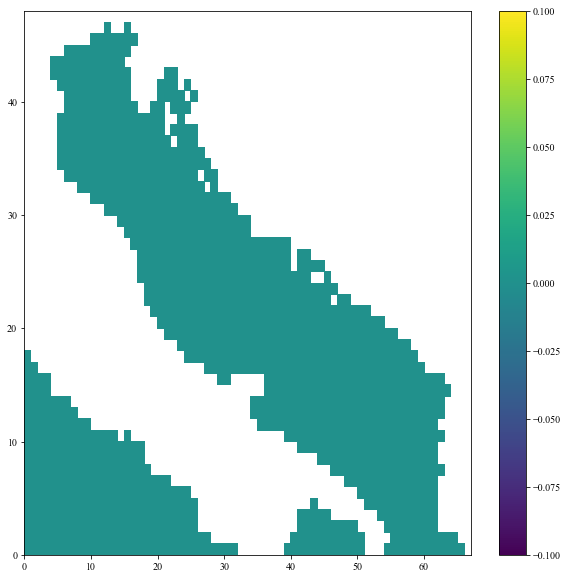

In [23]:
fig = plt.figure(figsize=(10, 10))
plt.pcolormesh(ammonium_diff)
plt.colorbar()
plt.show()
plt.close()